# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd
import collections
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Загрузим и изучим данные.**

In [2]:
train, test, full = (pd.read_csv('C:\\Users\\admin\\Desktop\\DS_yandex\\08_Восстановление золота из руды\\gold_recovery_train_new.csv'), 
                     pd.read_csv('C:\\Users\\admin\\Desktop\\DS_yandex\\08_Восстановление золота из руды\\gold_recovery_test_new.csv'), 
                     pd.read_csv('C:\\Users\\admin\\Desktop\\DS_yandex\\08_Восстановление золота из руды\\gold_recovery_full_new.csv'))

In [3]:
display(train.head())
train.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
display(test.head())
test.info()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
display(full.head())
full.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


**Проверим рассчеты эффективности обогащения.**

In [6]:
def recovery(row):
    F, C, T = row['rougher.input.feed_au'], row['rougher.output.concentrate_au'], row['rougher.output.tail_au']
    return C * (F - T) / (F * (C - T)) * 100

где:

`C` — доля золота в концентрате после флотации/очистки;   
`F` — доля золота в сырье/концентрате до флотации/очистки;    
`T` — доля золота в отвальных хвостах после флотации/очистки.
    

In [7]:
MAE(train['rougher.output.recovery'], train.apply(recovery,axis = 1))

9.730101616170628e-15

Параметр recovery в обучающем наборе данных рассчитан верно.

**Проанализируем признаки, недоступные в тестовой выборке.**

In [8]:
data_col = [collections.Counter(), collections.Counter(), collections.Counter()]
col = sorted(list(set(train) - set(test)))
for i in col:
    split_str = list(map(str,i.split(".")))
    for j in range(3):
        data_col[j][split_str[j]]+= 1

In [9]:
display(col, data_col, len(col))

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

[Counter({'final': 9,
          'primary_cleaner': 8,
          'rougher': 13,
          'secondary_cleaner': 4}),
 Counter({'output': 30, 'calculation': 4}),
 Counter({'concentrate_ag': 3,
          'concentrate_au': 3,
          'concentrate_pb': 3,
          'concentrate_sol': 3,
          'recovery': 2,
          'tail_ag': 4,
          'tail_au': 4,
          'tail_pb': 4,
          'tail_sol': 4,
          'au_pb_ratio': 1,
          'floatbank10_sulfate_to_au_feed': 1,
          'floatbank11_sulfate_to_au_feed': 1,
          'sulfate_to_au_concentrate': 1})]

34

По итогу в тестовой выборке отсутствует 34 признака: 
*** 
* 30  являются параметрами продукта (руды на разных этапах обработки); 
* 4 рассчитываются на основании уже полученых данных.
***
- 13 относятся к этапу флотации; 
- 8 - к первичной этапу очистки; 
- 4 - ко вторичному;
- 9 - параметрам обработанного продукта.

**Важно**: в тестовой выборке отсутствуют целевые признаки `rougher.output.recovery` и `final.output.recovery`.

**Проведём предобработку данных.**

Добавим в `test` недостающие целевые признаки.

In [10]:
test = test.merge(full[["date", "rougher.output.recovery", "final.output.recovery"]], on="date", how="left")

Переведем дату из `object`  в формат `datetime`.

In [11]:
train['date'], test['date'], full['date'] = [pd.to_datetime(df, format = '%Y-%m-%d %H:%M:%S') for df in 
                                             [train['date'], test['date'], full['date']]]

In [12]:
train.isnull().sum().sum(), test.isna().sum().sum(), full.isna().sum().sum()

(4100, 90, 4481)

Из описания проекта известно, что данные индексируются датой и временем получения информации (признак date) и соседние по времени параметры часто похожи. Поэтому пропуски в наших наборах данных можно заполнить используя `fillna` с методом `ffill`.

In [13]:
train = train.set_index('date').fillna(method='ffill')
test = test.set_index('date').fillna(method='ffill')
full = full.set_index('date').fillna(method='ffill')

In [14]:
train.isnull().sum().sum(), test.isna().sum().sum(), full.isna().sum().sum()

(0, 0, 0)

**Вывод.**

1. Были подготовлены данные для дальнейшего анализа и машинного обучения. 
2. Проверена корректность расчитанной эффективности обогащения в обучающей выборке. Значение MAE получилось пренебрежительно малым, что подтверждает правильность расчетов в обучающей выборке. 
3. Для тестовой выборки были определены отсутствующие признаки, по сравнению с обучающей выборкой. Отсутсвали только целевые признаки и расчетные характеристики. 
4. Была проведена предобработка данных: заполнены пропуски и подкорректированны типы данных.

## Анализ данных

**Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.**

In [15]:
au_ag_pb = [[full["rougher.input.feed_au"].mean(), 
             full["rougher.output.concentrate_au"].mean(), 
             full["primary_cleaner.output.concentrate_au"].mean(), 
             full["final.output.concentrate_au"].mean()], 
            [full["rougher.input.feed_ag"].mean(), 
             full["rougher.output.concentrate_ag"].mean(), 
             full["primary_cleaner.output.concentrate_ag"].mean(), 
             full["final.output.concentrate_ag"].mean()], 
            [full["rougher.input.feed_pb"].mean(), 
             full["rougher.output.concentrate_pb"].mean(), 
             full["primary_cleaner.output.concentrate_pb"].mean(), 
             full["final.output.concentrate_pb"].mean()]]
au_ag_pb_n = ['золота:','серебра:', 'свинца:']
st_n = ['до флотации:', 'после флотации:', 'после 1-й фазы очистки:', 'после 2-й фазы очистки:']

In [16]:
for i in range(3):
    print('Концентрация', au_ag_pb_n[i])
    for j in range(4):
        print('   ', st_n[j], round(au_ag_pb[i][j], 3))
    print('-----------------------------------\n')
        

Концентрация золота:
    до флотации: 8.266
    после флотации: 19.772
    после 1-й фазы очистки: 32.119
    после 2-й фазы очистки: 44.077
-----------------------------------

Концентрация серебра:
    до флотации: 8.795
    после флотации: 11.995
    после 1-й фазы очистки: 8.442
    после 2-й фазы очистки: 5.168
-----------------------------------

Концентрация свинца:
    до флотации: 3.585
    после флотации: 7.606
    после 1-й фазы очистки: 9.81
    после 2-й фазы очистки: 9.979
-----------------------------------



С каждым последующим этапом обработки концентрация золота и свинца увеличивается,а концентрация серебра - уменьшается.

**Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.**

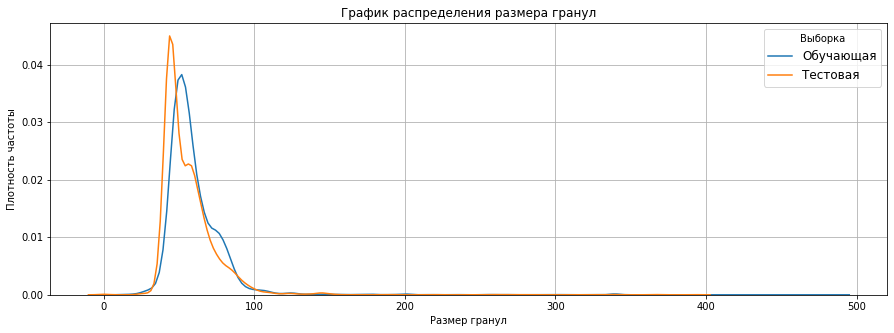

In [17]:
plt.figure(figsize=(15, 5))
plt.title('График распределения размера гранул')
for df, leg in zip([train, test], ['Обучающая', 'Тестовая']):
    sns.distplot(df['rougher.input.feed_size'], hist = False, label = leg)
plt.legend(prop={'size': 12}, title = 'Выборка')
plt.xlabel('Размер гранул')
plt.ylabel('Плотность частоты')
plt.grid(True)

Размеры гранул в обучающей и тестовой выборках имеют незначительные расхождения, что не должно послиять на качество оценки модели.

Уберем из выборок строки со слишком малыми и большими размерами гранул.

In [18]:
train = train[(train['rougher.input.feed_size'] > 20) & (train['rougher.input.feed_size'] < 100)]
test = test[(test['rougher.input.feed_size'] > 20) & (test['rougher.input.feed_size'] < 100)]

**Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

In [19]:
def sum_con_mat(row):
    au, ag, pb, sol = (row['rougher.input.feed_au'], 
                       row['rougher.input.feed_ag'], 
                       row['rougher.input.feed_pb'], 
                       row['rougher.input.feed_sol'])
    out_rougher, out_primary_cleaner, out_final,  = [], [], []
    for stage, array in zip(['rougher', 'primary_cleaner', 'final'], 
                            [out_rougher, out_primary_cleaner, out_final]):
        for sub in ['au', 'ag', 'pb', 'sol']:
            array.append(row[stage + ".output.concentrate_" + sub])
    return pd.Series([ag + au + pb + sol, 
                      sum(out_rougher), 
                      sum(out_primary_cleaner), 
                      sum(out_final)])

In [20]:
sum_concentration = full.apply(sum_con_mat, axis = 1)
sum_concentration.columns = ['before_rougher', 'rougher', 'primary_cleaner', 'final']

In [21]:
display(sum_concentration.head(), len(sum_concentration))

,before_rougher,rougher,primary_cleaner,final
date,,,,
2016-01-15 00:00:00,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,47.859163,65.908382,71.321010,64.004667


19439

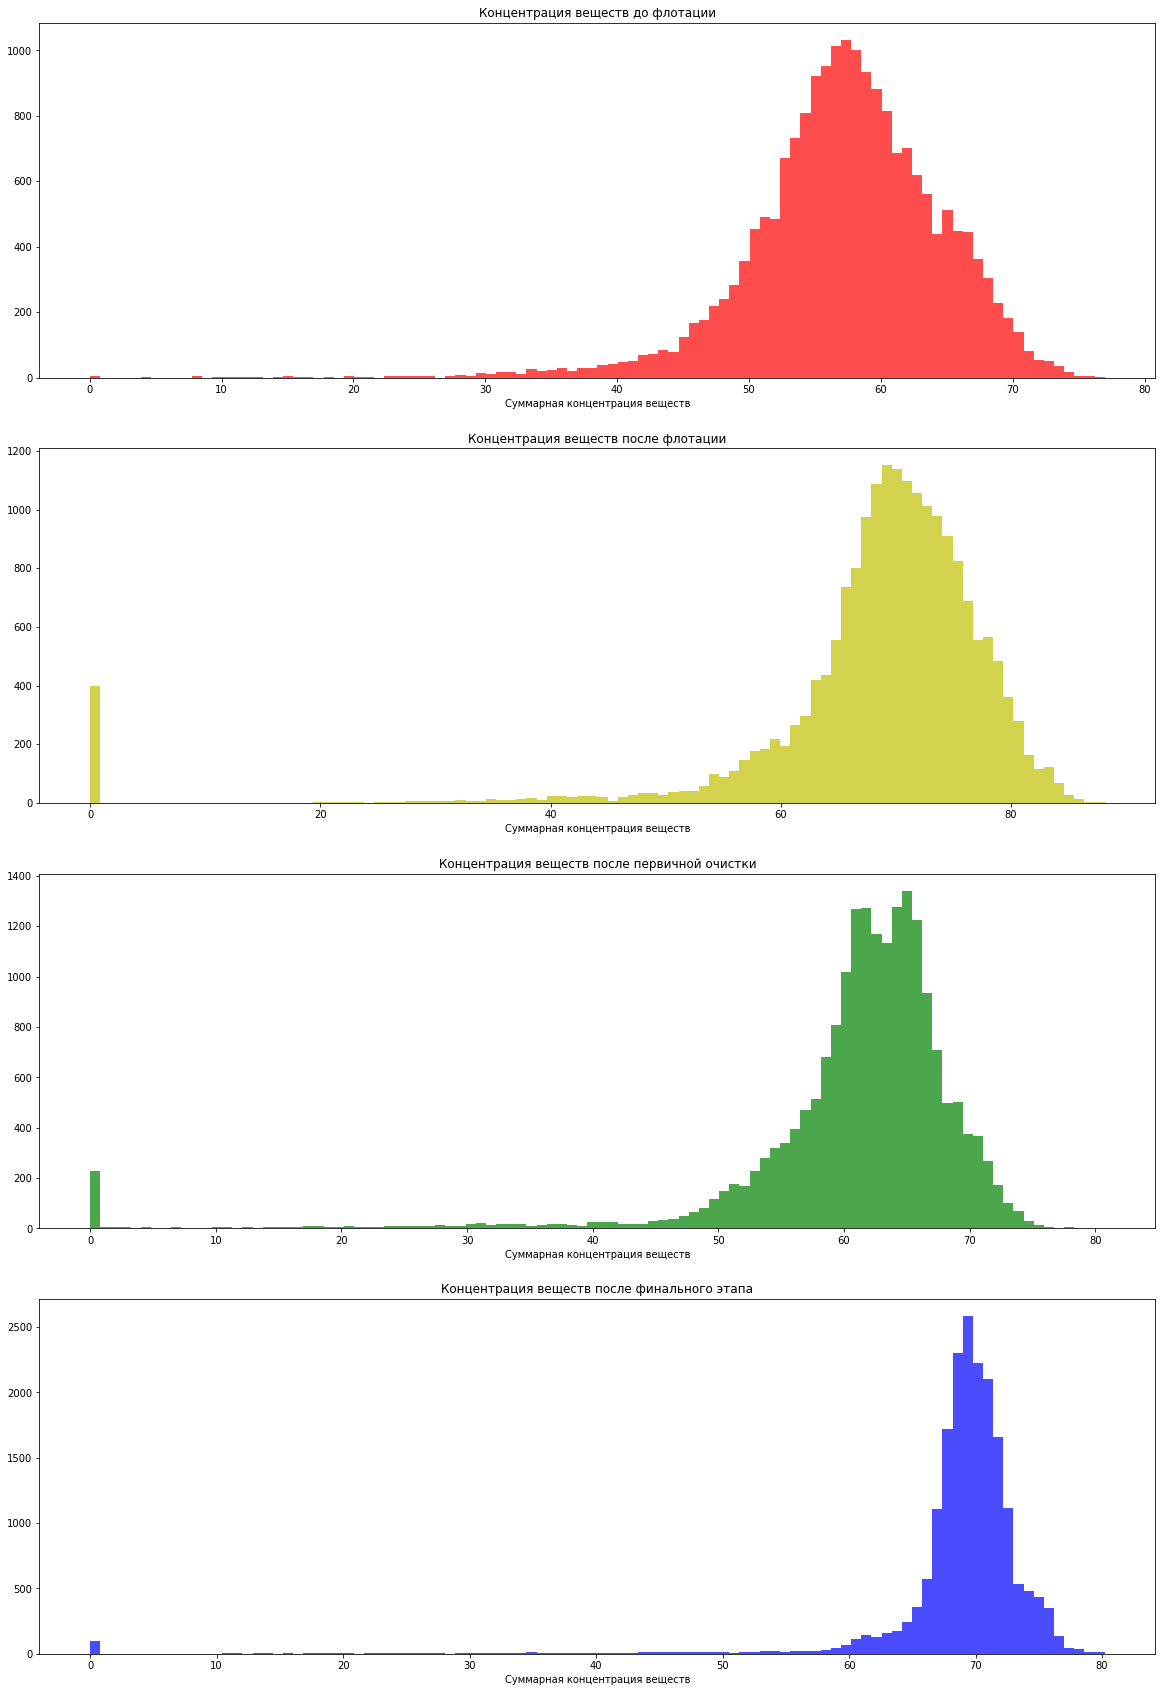

In [22]:
fig,ax = plt.subplots(4,1,figsize = (20,30))
for n, col, tit, color in zip(range(4), 
                              list(sum_concentration.columns), 
                              ['до флотации', 'после флотации', 'после первичной очистки', 'после финального этапа'], 
                              ['r', 'y', 'g', 'b']):
    ax[n].hist(sum_concentration[col], bins = 100, color = color, alpha = 0.7)
    ax[n].set_xlabel('Суммарная концентрация веществ')
    ax[n].set_title('Концентрация веществ ' + tit)
plt.show()

На графиках видны значения в районе нуля. Очевидно, что это выбросы, от которых необходимо избавиться.

In [23]:
df = []
for col in sum_concentration.columns:
  df.append(sum_concentration[sum_concentration[col]>10].index)
set_index = set(df[0]).intersection(set(df[1])).intersection(set(df[2]))
print(len(set_index))

18775


In [24]:
sum_concentration = sum_concentration.loc[set_index,:]

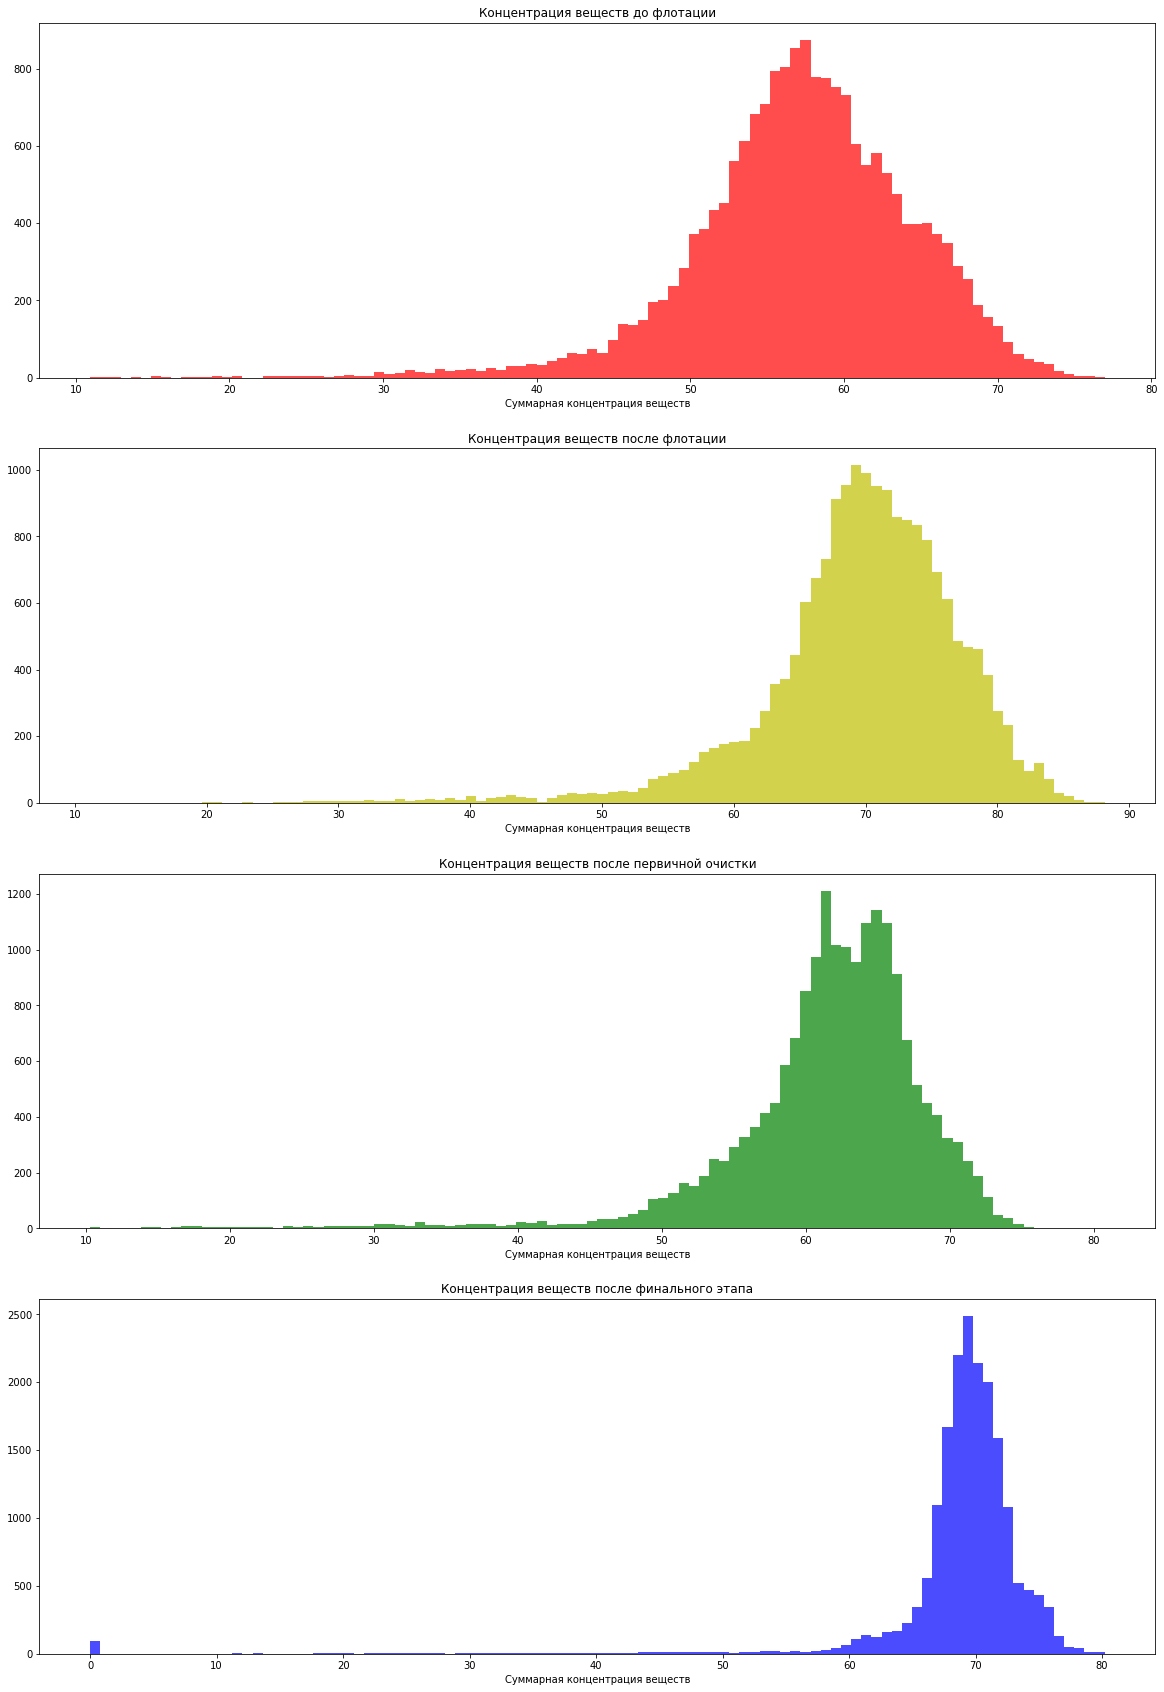

In [25]:
fig,ax = plt.subplots(4,1,figsize = (20,30))

for n, col, tit, color in zip(range(4), 
                              list(sum_concentration.columns), 
                              ['до флотации', 'после флотации', 'после первичной очистки', 'после финального этапа'], 
                              ['r', 'y', 'g', 'b']):
    ax[n].hist(sum_concentration[col], bins = 100, color = color, alpha = 0.7)
    ax[n].set_xlabel('Суммарная концентрация веществ')
    ax[n].set_title('Концентрация веществ ' + tit)
plt.show()

In [26]:
train_index = set(set_index).intersection(set(train.index))
train = train.loc[train_index,:]
train.shape

(13303, 86)

In [27]:
test_index = set(set_index).intersection(set(test.index))
test = test.loc[test_index,:]
test.shape

(5058, 54)

**Вывод.**

1. Была исследованна концентрация металлов на каждом этапе. Концентрация золота в ходе технологического процесса увеличивается. 
2. Было исследованно распределение размеров гранул для обучающей и тестовой выборок. Распределения отличаются не сильно, и на оценку модели данный признак не будет влиять негативно. 
3. Были определены аномальные значения для суммарных концентраций на каждом этапе. Было решено для обеих выборок удалить наблюдения. 

## Модель

**Напишем функцию для вычисления итоговой sMAPE.**

In [28]:
def smape(target, predictions):
    y_calc = abs(target - predictions) / ((abs(target) + abs(predictions)) / 2) * 100
    result = y_calc.sum() / len(target)
    return result
def final_smape(sample_true, sample_pred):
    rougher = smape(sample_true.iloc[:, 0], sample_pred[:,0])
    cleaner = smape(sample_true.iloc[:, 1], sample_pred[:,1])
    return 0.25 * rougher + 0.75 * cleaner

In [29]:
def smape_cv(model, features, target):
    return np.abs(np.average(cross_validate(model, features, target, scoring=smape_scorer)["test_score"]))

**Подготовим выборки к обучению моделей и обучим им.**

In [30]:
train_columns = list(test.columns)
train = train[train_columns].dropna()
train.shape

(13303, 54)

In [31]:
features_train = train.drop(["rougher.output.recovery", "final.output.recovery"], axis=1)
target_train = train[["rougher.output.recovery", "final.output.recovery"]]
features_test = test.drop(["rougher.output.recovery", "final.output.recovery"], axis=1)
target_test = test[["rougher.output.recovery", "final.output.recovery"]]

In [32]:
features_train.shape, features_test.shape

((13303, 52), (5058, 52))

In [33]:
feature_scaler = StandardScaler()
features_train = feature_scaler.fit_transform(features_train)

In [34]:
features_test = feature_scaler.transform(features_test)

In [35]:
smape_scorer = make_scorer(final_smape, greater_is_better=False)

In [36]:
model_DT = DecisionTreeRegressor(random_state=1)
params = {'max_depth':[x for x in range(1, 20, 1)], 
          'min_samples_leaf':[x for x in range(2, 20, 1)]}
grid_DT = RandomizedSearchCV(model_DT, params, scoring=smape_scorer, n_iter=10, random_state=12345, cv=5)
grid_DT.fit(features_train, target_train)
print('Лучший результат:')
print(grid_DT.best_params_)
print('\nsMAPE:')
print(grid_DT.best_score_ * (-1))

Лучший результат:
{'min_samples_leaf': 15, 'max_depth': 16}

sMAPE:
6.869346047304272


In [37]:
model_LR = LinearRegression()
scores = cross_val_score(model_LR, features_train, target_train, cv=5, scoring=smape_scorer)
scores.mean() * (-1)

7.649726036401343

In [38]:
model_RF = RandomForestRegressor(random_state=1)
params = {'n_estimators':[x for x in range(100, 101, 10)],
          'max_depth':[x for x in range(17, 18, 1)], 
          'min_samples_leaf':[x for x in range(3, 4, 1)]}
grid_RF = RandomizedSearchCV(model_RF, params, scoring=smape_scorer, n_iter=1, random_state=12345, cv=5)
grid_RF.fit(features_train, target_train)
print('Лучший результат:', grid_RF.best_params_)
print('sMAPE:', grid_RF.best_score_ * (-1) )

Лучший результат: {'n_estimators': 100, 'min_samples_leaf': 3, 'max_depth': 17}
sMAPE: 5.471380749504702


Проверим модели на тестовом наборе данных.

In [39]:
model_DT = grid_DT.best_estimator_
predictions = model_DT.predict(features_test)
print('sMAPE DecisionTree:', final_smape(target_test, predictions))

sMAPE DecisionTree: 10.817099830164775


In [40]:
model_LR = LinearRegression()
model_LR.fit(features_train, target_train)
predictions = model_LR.predict(features_test)
print('sMAPE LinearRegression:', final_smape(target_test, predictions))

sMAPE LinearRegression: 8.28814998777735


In [41]:
model_RF = grid_RF.best_estimator_
predictions = model_RF.predict(features_test)
print('sMAPE RandomForest:', final_smape(target_test, predictions))

sMAPE RandomForest: 9.065852544867772


Проверим лучшую модель на адекватность.

In [42]:
dummy_model = DummyRegressor()
dummy_model.fit(features_train, target_train)
dummy_predict = dummy_model.predict(features_test)
final_smape(target_test, dummy_predict)

8.781196978467104

**Вывод.**

Лучшая модель - **RandomForestRegressor** с показателями _**sMAPE**_ 5.489 - на обучающем наборе данных и 9.05 - на тестовом. Показатель константной модели равен 8.78.

**Общий вывод.**

В проекте был исследован процесс добычи и очистки золота из руды:

- посчитана эффективность обогащения золота после флотационного процесса и сравннена с реальными данными, получили, что расчеты верны, среднее абсолютное отклонение расчетной величины от реальных данных крайне мал;
- посчитаны изменения концентраций металлов (золота, серебра и свинца) после каждого этапа очистки, выявили, что:
  - концентрация золота увеличивается;
  - концентрация серебра уменьшается;
  - концентрация свинца после первичной очистки остается практически неизменной.
- были исследованы аномалии суммарных концентраций веществ на разных этапах очистки, удалены значения концентраций ниже 10г/м3;
- были обучены модели для расчета симметричного абсолютного процентного отклонения (_**sMAPE**_), итоговое отклонение составило 9.05%, в то время как "Dummy" модель дает 8.78%.